In [13]:
# %%
import random
from citipy import citipy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [14]:
import requests
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress
# %%
# generate 1500 random latitude and longitude data as a list of tuples
lats = np.random.uniform(-90.0,90.0,size=1500)
lngs = np.random.uniform(-180.0,180.0,size=1500)

In [15]:
lats_lngs = zip(lats, lngs)
coordinates = list(lats_lngs)
print(coordinates[:11])

[(57.25881874285167, 114.59260128970931), (-27.78343579975452, 88.88291152468258), (36.96140972294023, 74.77123049040446), (-56.41629582029615, 111.98255395987923), (50.3685977171767, 102.37513464786599), (-4.306544171027653, -5.263452078766363), (-26.462933604259895, 149.07822423051317), (-81.66448091217462, 82.85533527513758), (25.261925776322485, -149.78933786718517), (-60.802833626468995, 108.9451751702183), (-88.05872922096074, 83.17419445006311)]


In [16]:
# %%
# use citipy module to get nearest city names
cities = list()
for coor in coordinates:
    cities_name = citipy.nearest_city(coor[0], coor[1]).city_name
    # ensure no any duplicate cities
    if cities_name not in cities:
        cities.append(cities_name)
print(cities[:10], 'Generate', len(cities))

['bodaybo', 'carnarvon', 'hunza', 'albany', 'zakamensk', 'tabou', 'roma', 'busselton', 'hilo', 'parambu'] Generate 624


In [17]:
# %%
# use OpenWeather API to request, get, parse JSON to retrieve weather data for each city.


In [18]:
# initial counters for log and sets
record_count = 1 
set_count = 1

In [19]:
city_data = list()
basic_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + weather_api_key


In [21]:
print('Beginning Data Retrieval     ')
print("-----------------------------")

# use enumerate() method to loop index and item simutanously 
for i, item in enumerate(cities):
    if i % 50 == 0 and i != 0 :
        record_count = 1  # initialize at every beginning of set
        set_count +=1 # increment set count
    # build URL for API call
    url = basic_url + '&q=' + item
    # Log the URL, record, and set numbers and the city.
    print(f'Processing Record {record_count} of Set {set_count} | {item}')
    # increment record count
    record_count +=1

    try: 
        js = requests.get(url).json()
        city_name = item
        city_country = js['sys']['country']
        city_UTCdate = js['dt']
        city_date = datetime.utcfromtimestamp(city_UTCdate).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = js['coord']['lat']
        city_lon = js['coord']['lon']
        city_max_temp = js['main']['temp_max']
        city_humidity = js['main']['humidity']
        city_cload = js['clouds']['all']
        city_wind_speed = js['wind']['speed']
        # append as a list of dictionaries
        city_data.append({'City':city_name, 'Coounty':city_country, 'Date':city_date, 
                        'Lat':city_lat, 'Lng': city_lon,'Max Temp':city_max_temp,
                        'Humidity':city_humidity,'Cloudiness': city_cload,'Wind Speed':city_wind_speed})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print('-------------------------------')
print('Data Retrieval Complete        ')
print('-------------------------------')

print(len(city_data))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bodaybo
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | hunza
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | zakamensk
Processing Record 6 of Set 1 | tabou
Processing Record 7 of Set 1 | roma
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | parambu
Processing Record 11 of Set 1 | cabo san lucas
Processing Record 12 of Set 1 | codrington
Processing Record 13 of Set 1 | khuzhir
Processing Record 14 of Set 1 | sur
Processing Record 15 of Set 1 | licheng
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | waingapu
Processing Record 18 of Set 1 | verkhnevilyuysk
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Set 1 | ola
Processing Record 23 o

Processing Record 39 of Set 4 | phalaborwa
Processing Record 40 of Set 4 | bluff
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | leeds
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | chifeng
Processing Record 45 of Set 4 | newport
Processing Record 46 of Set 4 | marcona
City not found. Skipping...
Processing Record 47 of Set 4 | mantua
Processing Record 48 of Set 4 | belen
Processing Record 49 of Set 4 | fare
Processing Record 50 of Set 4 | hailey
Processing Record 1 of Set 5 | maniitsoq
Processing Record 2 of Set 5 | tutoia
Processing Record 3 of Set 5 | tsogni
Processing Record 4 of Set 5 | kahului
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | placido de castro
Processing Record 8 of Set 5 | davila
Processing Record 9 of Set 5 | nzega
Processing Record 10 of Set 5 | kurobe
City not found. Skipping...
Processing Record 11 of Set 5 | faanui
Processing Record 12 of Set 

Processing Record 30 of Set 8 | vitim
Processing Record 31 of Set 8 | shubarshi
Processing Record 32 of Set 8 | turukhansk
Processing Record 33 of Set 8 | el badari
City not found. Skipping...
Processing Record 34 of Set 8 | san andres
Processing Record 35 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 8 | umba
Processing Record 37 of Set 8 | hudson bay
Processing Record 38 of Set 8 | hovd
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | leshukonskoye
Processing Record 42 of Set 8 | bapatla
Processing Record 43 of Set 8 | bama
Processing Record 44 of Set 8 | strausberg
Processing Record 45 of Set 8 | caravelas
Processing Record 46 of Set 8 | amzya
Processing Record 47 of Set 8 | pontianak
Processing Record 48 of Set 8 | saleaula
City not found. Skipping...
Processing Record 49 of Set 8 | kuche
City not found. Skipping...
Processing Record 50 of Set 8 

Processing Record 20 of Set 12 | lancaster
Processing Record 21 of Set 12 | great yarmouth
Processing Record 22 of Set 12 | bartlesville
Processing Record 23 of Set 12 | sheltozero
Processing Record 24 of Set 12 | qinhuangdao
Processing Record 25 of Set 12 | basco
Processing Record 26 of Set 12 | piet retief
Processing Record 27 of Set 12 | quatre cocos
Processing Record 28 of Set 12 | abu zabad
Processing Record 29 of Set 12 | flinders
Processing Record 30 of Set 12 | cam ranh
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | yanam
Processing Record 33 of Set 12 | porto velho
Processing Record 34 of Set 12 | praia da vitoria
Processing Record 35 of Set 12 | kolosovka
Processing Record 36 of Set 12 | coihaique
Processing Record 37 of Set 12 | sibirtsevo
City not found. Skipping...
Processing Record 38 of Set 12 | bolshoy lug
Processing Record 39 of Set 12 | nong kung si
Processing Record 40 of Set 12 | geraldton
Processing Record 41 of Set 12 | hampton
Process

In [23]:
# %%
# convert the list of dictionaries into DataFrame, and export to .csv file

unmod_city_data_df = pd.DataFrame(city_data)
city_data_df = unmod_city_data_df.rename(columns={'Coounty': 'Country'})
city_data_df.head()
city_data_df.to_csv(path_or_buf='weather_data/cities.csv', index_label='City_ID')

In [24]:
# %%
# 4 scatter plots, showcase weather parameter changing by latitude
# extract relevant fields(columns) as Series
lats_Series = city_data_df['Lat']
max_temp_Series = city_data_df['Max Temp']
humidity_Series = city_data_df['Humidity']
cloud_Series = city_data_df['Cloudiness']
wind_speed_Series = city_data_df['Wind Speed']

In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1622307332.581509

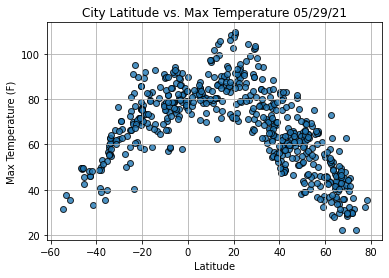

In [32]:
#show today's datetime in fig label
today = time.strftime('%x')
# %%
# build the 1st scatter plot for lat vs. Max Temp.
fig = plt.figure()
plt.scatter(lats_Series,max_temp_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('weather_data/Fig1.png')
plt.show()

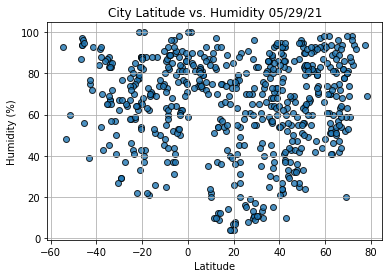

In [35]:
# build the 2nd scatter plot for lat vs. Humidity.
fig = plt.figure()
plt.scatter(lats_Series,humidity_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Humidity " + today)
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('weather_data/Fig2.png')
#plt.legend()
plt.show()

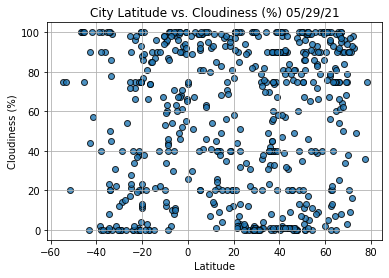

In [37]:
# build the 3rd scatter plot for lat vs. Cloudiness.
fig = plt.figure()
plt.scatter(lats_Series,cloud_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('weather_data/Fig3.png')
plt.show()

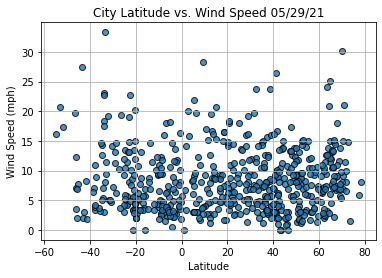

In [38]:
# build the 4th scatter plot for lat vs. Wind Speed.
fig = plt.figure()
plt.scatter(lats_Series,wind_speed_Series, 
            alpha=0.8, edgecolors='k', linewidths=1,marker='o', label='Cities' )
plt.title(f"City Latitude vs. Wind Speed " + today)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('weather_data/Fig4.png')
plt.show()